 Marine VAN RENTERGHEM (31621700)  
# LMAPR1492 Physique des matériaux : Tâche 7
Notebook permettant de télécharger le fichier CIF correspondant au materiau mp-9035 et  de déterminer les 3 premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d’onde $\lambda=1.54060 \overset{\circ}{A}$

## 1.Télécharger le fichier CIF du matériau mp-9035

In [1]:
#Code permettant de créer le fichier CIF computed de la structure du NaLuS2 (mp-9035) 
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
with MPRester("lTqZwmbprAgWB64c") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-9035")
    w = CifWriter(structure)
    w.write_file('NaLuS2_computed.cif')

In [2]:
#Code permettant de créer le fichier CIF symmetrized de la structure du NaLuS2 (mp-9035)
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
with MPRester("lTqZwmbprAgWB64c") as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-9035")
    w = CifWriter(structure,symprec=0.1)
    w.write_file('NaLuS2_symmetrized.cif')

## 2. Diffraction par rayon X Cu K$\alpha$ du $NaLuS_2$

In [3]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator
import matplotlib.pyplot as plt
#structure=SpacegroupAnalyzer(structure).get_conventional_standard_structure()
structure=SpacegroupAnalyzer(structure).get_primitive_standard_structure()
DifPat=XRDCalculator().get_pattern(structure, scaled=False, two_theta_range=None)
Difs=XRDCalculator().get_pattern(structure, scaled=True, two_theta_range=None)

Lorsque nous envoyons des rayons X sur un cristal, un phénomène de diffraction apparait. On peut ainsi distinguer des interférences constructives et des interférences destructives. Trouvez-ci dessous le diffractogramme du $NaLuS_2$ pour un rayonnement $Cu\ K\alpha$ de longueur d'onde $\lambda=1.54060 \overset{\circ}{A}$. Notons que l'intensité sur le graphe a été mise à l'échelle. En effet, la plus grande intensité a été réduite à 100 et toutes les autres ont subi la même transformation.

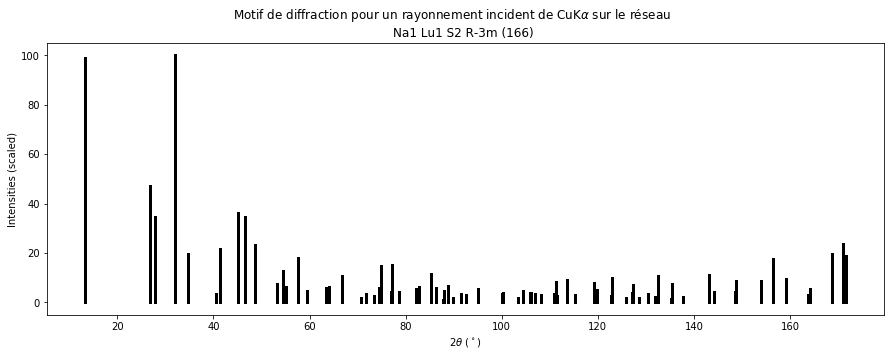

In [4]:
c = XRDCalculator()
c.plot_structures([structure],two_theta_range=[0,175],annotate_peaks=False, fontsize=25,title=r"Motif de diffraction pour un rayonnement incident de CuK$\alpha$ sur le réseau", size_kwargs=dict(w=15, h=5))
plt.show()

Chaque pic du difractogramme est un pic d'interférence constructive. Considérons le cristal comme une série de plans (hkl) séparés par une distance $d_{hkl}$. Selon la condition de Bragg, la position de chaque pic est déterminée par la formule suivante : 

$n \lambda = 2d_{hkl} \sin \theta$ avec $\theta$ l'angle de réflexion.

Analysons donc les 3 premiers pics du diffractogramme dont voici un zoom : 


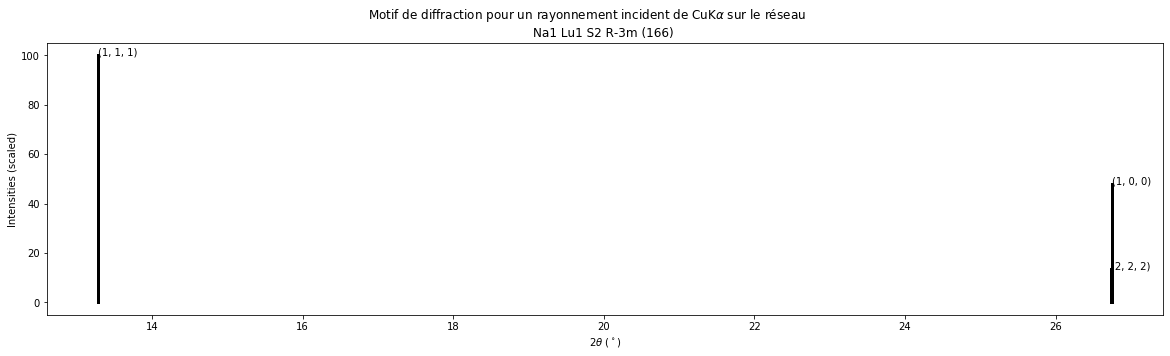

In [5]:
c = XRDCalculator()
c.plot_structures([structure],two_theta_range=[5,27],annotate_peaks=True, fontsize=10,title=r"Motif de diffraction pour un rayonnement incident de CuK$\alpha$ sur le réseau", size_kwargs=dict(w=20, h=5))
plt.show()

### 2.1 Premier pic

In [6]:
print("Indices de Miller (h,k,l) du premier pic : ", DifPat.hkls[0])
print("Distance interplanaire du premier pic (A) : ",  DifPat.d_hkls[0])
print("2\u03B8(\u00b0) du premier pic :",DifPat.x[0])
print("Intensité du premier pic: ", DifPat.y[0])
print("Intensité du premier pic mise à l'échelle: ",Difs.y[0])


Indices de Miller (h,k,l) du premier pic :  [{'hkl': (1, 1, 1), 'multiplicity': 2}]
Distance interplanaire du premier pic (A) :  6.668155286983993
2θ(°) du premier pic : 13.27787233644682
Intensité du premier pic:  1177895.5681897113
Intensité du premier pic mise à l'échelle:  98.84513402979391


### 2.2 Deuxième pic

In [7]:
print("Indices de Miller (h,k,l) du deuxième pic : ", DifPat.hkls[1])
print("Distance interplanaire du deuxième pic (A) : ",  DifPat.d_hkls[1])
print("2\u03B8(\u00b0) du deuxième :",DifPat.x[1])
print("Intensité du deuxième pic : ", DifPat.y[1])
print("Intensité du deuxième pic mise à l'échelle: ",Difs.y[1])


Indices de Miller (h,k,l) du deuxième pic :  [{'hkl': (2, 2, 2), 'multiplicity': 2}]
Distance interplanaire du deuxième pic (A) :  3.3340776434919963
2θ(°) du deuxième : 26.738332385620108
Intensité du deuxième pic :  159177.9836565337
Intensité du deuxième pic mise à l'échelle:  13.357694479913615


### 2.3 Troisième pic

In [8]:
print("Indices de Miller du troisième pic : ", DifPat.hkls[2])
print("Distance interplanaire du troisième pic (A) : ",  DifPat.d_hkls[2])
print("2\u03B8(\u00b0) du troisième pic:",DifPat.x[2])
print("Intensité du troisième pic : ", DifPat.y[2])
print("Intensité du troisième pic mise à l'échelle: ",Difs.y[2])

Indices de Miller du troisième pic :  [{'hkl': (1, 0, 0), 'multiplicity': 6}]
Distance interplanaire du troisième pic (A) :  3.3321501995718577
2θ(°) du troisième pic: 26.754086068676795
Intensité du troisième pic :  562558.6952130301
Intensité du troisième pic mise à l'échelle:  47.208081199777496


### 2.4 Tableau récapitulatif des valeurs renvoyées par Pymatgen

|               | Indices de Miller (hkl)| Multiplicité | $d_{hkl}$ $[\overset{\circ}{A}]$ | $2\theta$ $[$°$]$ |   Intensité   |Intensité [\%]|
|:-------------:|:-----------------:|:------------:|:----------------------------:|:-------------:|:-----:|:-------|
| Premier Pic  |      (111)      |       2      |             6.668            |     13.28     | 1177895.568 |98.845|
| Deuxième pic |      (222)      |       2      |             3.334            |     26.74     | 159177.984 |13.358|
| Troisième pic |      (100)      |       6      |             3.332            |     26.75     | 562558.695 |47.208|

<!-- | Quatrième pic |      (1,1,0)      |       6      |             3.202            |     27.87     | 409783.834 |34.388|-->

Ces résultats vérifient bien la condition de Bragg.

### 2.5 Calculs théoriques

Le matériau mp-9035 est un réseau trigonal rhomboédrique. Pour ce type de réseau, la distance interplanaire est donnée par la formule suivante : 

$$d_{hkl}=\sqrt{\frac{a^2 (1-3\cos^2\alpha+2cos^3\alpha)}{(h^2+k^2+l^2)\sin^2\alpha+2(hk+kl+hl)(cos^2\alpha-\cos \alpha)}}$$

On voit donc que l'indice de Miller a un effet sur le dénominateur. Soit la condition de Bragg énoncée précédemment : 

$$n \lambda = 2d_{hkl} \sin \theta$$

Nous cherchons donc les 3 indices de Miller tels que leurs valeurs de theta correspondantes soient les plus petites.On peut remarquer que plus $\theta$ est petit, plus $d_{hkl}$ est grand et plus le dénominateur de $d_{hkl}$ est petit. Nous cherchons donc les 3 indices de Miller de telle sorte à minimiser: $$(h^2+k^2+l^2)\sin^2\alpha+2(hk+kl+hl)(cos^2\alpha-\cos \alpha)$$

Par essais multiples, nous remarquons bien que les 3 indices de Miller (hkl) recherchés sont (111),(222),(100).

In [13]:
import numpy as np
import pandas as pd

#Fonction calculant la distance interplanaire
def distance(alpha,a,h,k,l): 
    D=(h*h+k*k+l*l)*(np.sin(alpha))**2+2*(h*k+k*l+h*l)*(np.cos(alpha)**2-np.cos(alpha))
    N=a*a*(1-3*np.cos(alpha)**2+2*np.cos(alpha)**3)
    dist=np.sqrt(N/D)
    return dist

#Fonction calculant l'angle de réflexion 
def theta(dist,lam): 
    th=np.arcsin(lam/(2*dist))*360/(2*np.math.pi)
    return 2*th

alpha=structure.lattice.alpha*2*np.math.pi/360
a=structure.lattice.a
lam=1.5406


data = [["Premier Pic","(111),(-1-1-1)", distance(alpha,a,1,1,1),theta(distance(alpha,a,1,1,1),lam)], ["Deuxième Pic","(222),(-2-2-2)", distance(alpha,a,2,2,2),theta(distance(alpha,a,2,2,2),lam)],["Troisième Pic","(100),(010),(001),(-100),(0-10),(00-1)", distance(alpha,a,1,0,0),theta(distance(alpha,a,1,0,0),lam)]]
pd.DataFrame(data, columns=["","(hkl)", "Distance (A)","2\u03B8(\u00b0)"],index=[1,2,3])

,,(hkl),Distance (A),2θ(°)
1,Premier Pic,"(111),(-1-1-1)",6.668155,13.267146
2,Deuxième Pic,"(222),(-2-2-2)",3.334078,26.716430
3,Troisième Pic,"(100),(010),(001),(-100),(0-10),(00-1)",3.332150,26.732170


Ci-dessus sont représentées les valeurs théoriques obtenues grâces aux formules mentionnées précédemment. Remarquons que celle-ci sont très proches de celles renvoyées par pymatgen.

Théoriquement, il est aussi possible de retouver la valeur de l'intensité des pics.
Nous savons que $I\propto |S_K|^2$ et que $S_K$ est le facteur de structure de la maille défini par :  $$S_K=\sum\limits^N_jf_j(K)e^{iK\cdot r_j'}$$
avec $f_j$ le facteur de forme atomique et $r_j'$ la position de de l'atome j dans la maille

Pour la structure cristalline du $NaLuS_2$, cette formule peut être traduite comme : 
$$S_K=f_{Na}(K)e^{i\pi(h+k+l)}+f_{Lu}(K)+f_S\left(e^{i\pi\cdot 1.482(h+k+l)}+e^{i\pi\cdot 0.52(h+k+l)}\right)$$

 ## 3.Références
 [1]« Materials Project ». [En ligne]. Disponible sur: https://materialsproject.org/. [Consulté le: 17-mars-2020].
 
 [2]« pymatgen.analysis.diffraction.xrd module — pymatgen 2020.3.13 documentation ». [En ligne]. Disponible sur: https://pymatgen.org/pymatgen.analysis.diffraction.xrd.html. [Consulté le: 17-mars-2020].
 
 [3] « pymatgen.analysis.diffraction.core module — pymatgen 2020.3.13 documentation ». [En ligne]. Disponible sur: https://pymatgen.org/pymatgen.analysis.diffraction.core.html. [Consulté le: 17-mars-2020].

